# Data Glacier Internship

Deliverable - Week 12

Logistic Regression Algorithm

Nahari Terena - LISUM15

## Problem Statement

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

### Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import ConvergenceWarning

### Import dataset

In [2]:
data = pd.read_csv('Healthcare_clean.csv', sep = ";")
df = data.drop(['Ptid'], axis=1)

df.tail()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,1,0,0,0,0,0,0,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,0,0,0,0,0,0,0,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,0,...,0,0,1,0,0,0,0,0,0,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,...,0,0,0,0,0,0,0,0,0,0
3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,...,0,0,1,0,0,0,0,0,0,1


In [3]:
def altCleaning(data):
    # import pandas as pd
    import numpy as np
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder

    # data = pd.read_excel(str(input_file_path), sheet_name=1)

    # Elimination of variables with more than 40% missing values
    # data = data.drop(columns=['Risk_Segment_During_Rx',
    #                           'Tscore_Bucket_During_Rx',
    #                           'Change_T_Score',
    #                           'Change_Risk_Segment'])

    # replacing the missing values into actual null values. "Unknown" => "NULL"
    data.replace(
        ["Other/Unknown", "Unknown"],
        np.nan
    )

    # splitting the descriptive variables from the target variable
    features = data.iloc[:, 2:]
    target = data.Persistency_Flag

    # transformations 
    imputer = SimpleImputer(strategy="most_frequent")
    label_encoder = LabelEncoder()
    ohe = OneHotEncoder()

    # fitting transformations 
    imputer.fit(features)
    label_encoder.fit(target)
    ohe.fit(features)

    # transform 
    features = imputer.fit_transform(features)
    features = ohe.fit_transform(features).toarray()
    target = label_encoder.fit_transform(target)

    # Assigning the variables X and Y
    X = features
    Y = target

    # returning the features and the labels
    return X, Y

In [4]:
X, y = altCleaning(df)

df.shape

(3424, 64)

In [5]:
# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2568, 199)
(2568,)
(856, 199)
(856,)


In [7]:
# using GridSearchCV with logistic regression 

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "penalty":["l1","l2"]
}

lg_gs = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= params,
    cv= 5
)

In [8]:
# train the model 

lg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [9]:
# see different combinations of parameters with accuracy after hypertuning 

pd.concat([pd.DataFrame(lg_gs.cv_results_["params"]),pd.DataFrame(lg_gs.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,C,penalty,solver,Accuracy
0,0.001,l1,newton-cg,NaN
1,0.001,l1,lbfgs,NaN
2,0.001,l1,liblinear,0.619549
3,0.001,l1,sag,NaN
4,0.001,l1,saga,0.619549
...,...,...,...,...
65,1000.000,l2,newton-cg,0.807243
66,1000.000,l2,lbfgs,0.809581
67,1000.000,l2,liblinear,0.807632
68,1000.000,l2,sag,0.808800


In [10]:
# view the best params and score for the respective param after applying GridSearchCV

print(lg_gs.best_params_)
print(lg_gs.best_score_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.8154253987757981


In [11]:
# testing the model
y_pred = lg_gs.predict(X_test)

In [12]:
# f1_score 

f1_score(y_test, y_pred, average='weighted')

0.8156000342481541

[[481  63]
 [ 93 219]]


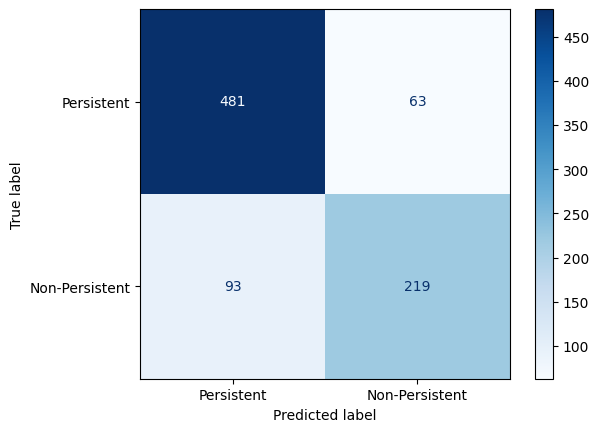

In [13]:
# confusion matrix

disp = plot_confusion_matrix(
    lg_gs,
    X_test,
    y_test,
    display_labels= ["Persistent", "Non-Persistent"],
    cmap= plt.cm.Blues
)

print(disp.confusion_matrix)

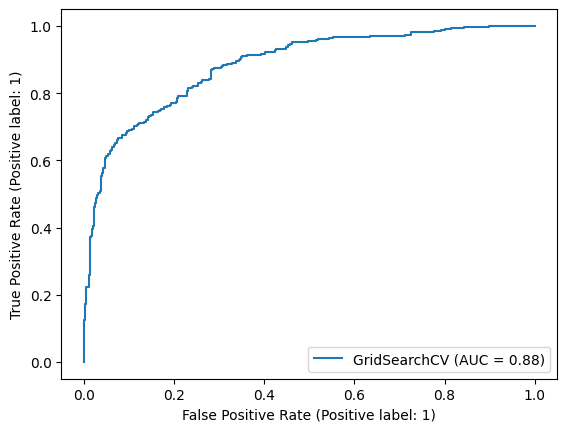

In [14]:
# ROC curve 

plot_roc_curve(lg_gs, X_test, y_test)
plt.show()